In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1 = pd.read_csv("E:\`MY STUDIES\Machine Learning\data files\Bengaluru_House_Data.csv")

In [2]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [7]:
df2[['total_sqft']].describe()

,total_sqft
count,13320
unique,2117
top,1200
freq,843


In [8]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()

In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [13]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))

<ipython-input-13-6edcebb3ab3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))


In [14]:
l = df3.bhk.unique()

In [15]:
df3.bhk.value_counts().sort_index()

1      649
2     5527
3     4832
4     1395
5      353
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [16]:
l.sort()

In [17]:
l

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 19,
       27, 43], dtype=int64)

In [18]:
df3.bhk.sum()

37114

In [19]:
df3.drop('size',axis=1,inplace=True)

C:\Users\lakshan rathnayake\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [21]:
df3.total_sqft.value_counts()

1200            843
1100            221
1500            204
2400            195
600             180
               ... 
1114              1
1565 - 1595       1
605 - 624         1
2736              1
117Sq. Yards      1
Name: total_sqft, Length: 2067, dtype: int64

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[~df3.total_sqft.apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [24]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

In [26]:
df4[['total_sqft']].isnull().sum()

total_sqft    46
dtype: int64

In [27]:
df4 = df4[df4.total_sqft.notnull()]


In [28]:
df4[['total_sqft']].isnull().sum()

total_sqft    0
dtype: int64

In [29]:
df4

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [30]:
df5 = df4.copy()
df5['price_for_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_for_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [31]:
df5_stats = df5['price_for_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_for_sqft, dtype: float64

In [32]:
df5.head()

,location,total_sqft,bath,price,bhk,price_for_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [33]:
location_stats = df5['location'].value_counts(ascending=False)
type(location_stats)
location_stats 

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
LIC Colony                     1
Chowdeshwari Layout            1
Kanakadasa Layout              1
Lakshmipura Vidyaanyapura      1
Gulakamale                     1
Name: location, Length: 1298, dtype: int64

In [34]:
len(location_stats)

1298

In [35]:
p=(location_stats[location_stats<10])

In [36]:
df5.isnull().sum()

location          0
total_sqft        0
bath              0
price             0
bhk               0
price_for_sqft    0
dtype: int64

In [37]:
df6=df5.copy()



In [38]:
df6.location = df6.location.apply(lambda x : 'other' if x in p else x)

In [39]:
df6.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [40]:
len(df6.location.unique())

254

In [41]:
df6.head()

,location,total_sqft,bath,price,bhk,price_for_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [42]:
df6.head()

,location,total_sqft,bath,price,bhk,price_for_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [43]:
df6[df6.total_sqft/df6.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_for_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [44]:
 df6.shape
    

(13200, 6)

In [45]:
df7 = df6[~(df6.total_sqft/df6.bhk<300)] 

In [46]:
df7.shape

(12456, 6)

In [47]:
df7.price_for_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_for_sqft, dtype: float64

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = subdf['price_for_sqft'].mean()
        std  = subdf['price_for_sqft'].std()
        reduced_df = subdf[(subdf.price_for_sqft>(mean-std)) & (subdf.price_for_sqft<(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    
df8 = remove_pps_outliers(df7)       

In [107]:
df8

,location,total_sqft,bath,price,bhk,price_for_sqft
0,Devarachikkanahalli,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...
10275,other,1353.0,2.0,110.00,2,8130.081301
10276,other,812.0,1.0,26.00,1,3201.970443
10277,other,1440.0,2.0,63.93,3,4439.583333
10278,other,1075.0,2.0,48.00,2,4465.116279


In [50]:
df8.shape

(10280, 6)

In [51]:
set(df8.bhk)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16}

In [52]:
df8.bhk.unique()

array([ 3,  2,  4,  5,  1,  6,  8,  9,  7, 10, 11, 16, 13], dtype=int64)

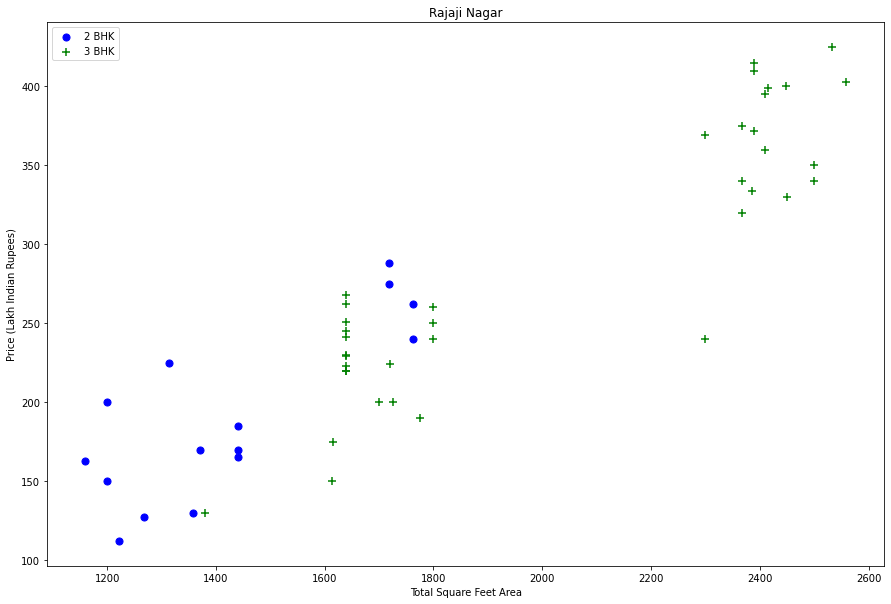

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

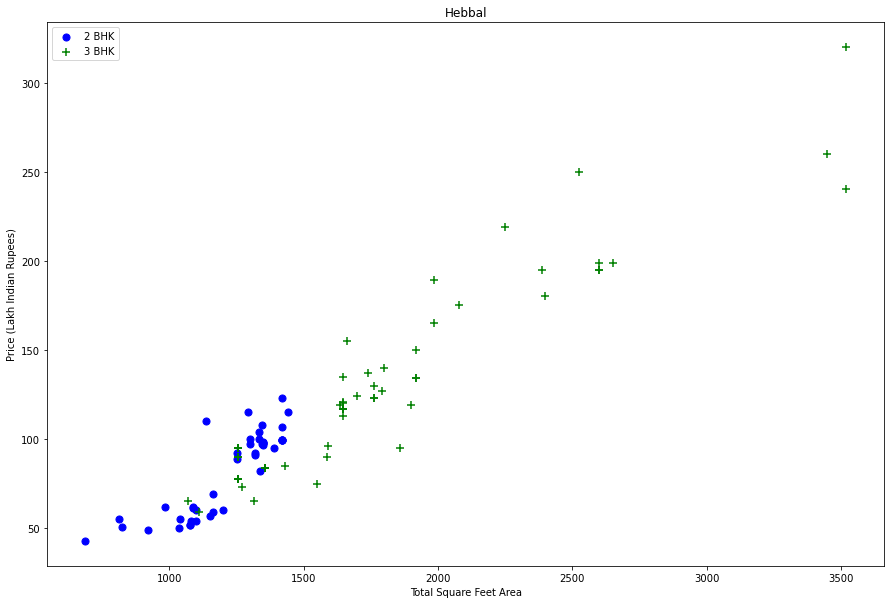

In [54]:
plot_scatter_chart(df8,"Hebbal")

In [55]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_for_sqft),
                'std': np.std(bhk_df.price_for_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_for_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)
# df8 = df7.copy()
df9.shape

(7430, 6)

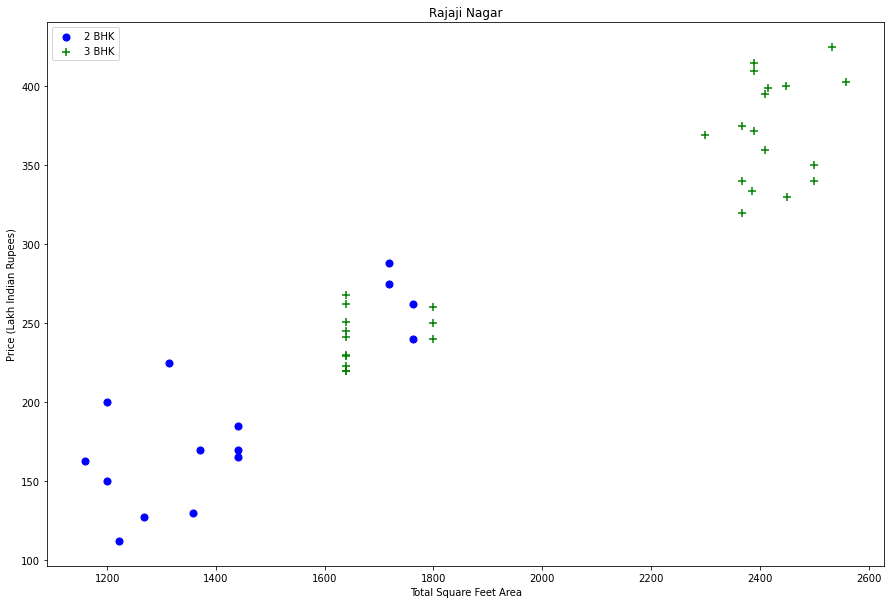

In [56]:
plot_scatter_chart(df9,"Rajaji Nagar")

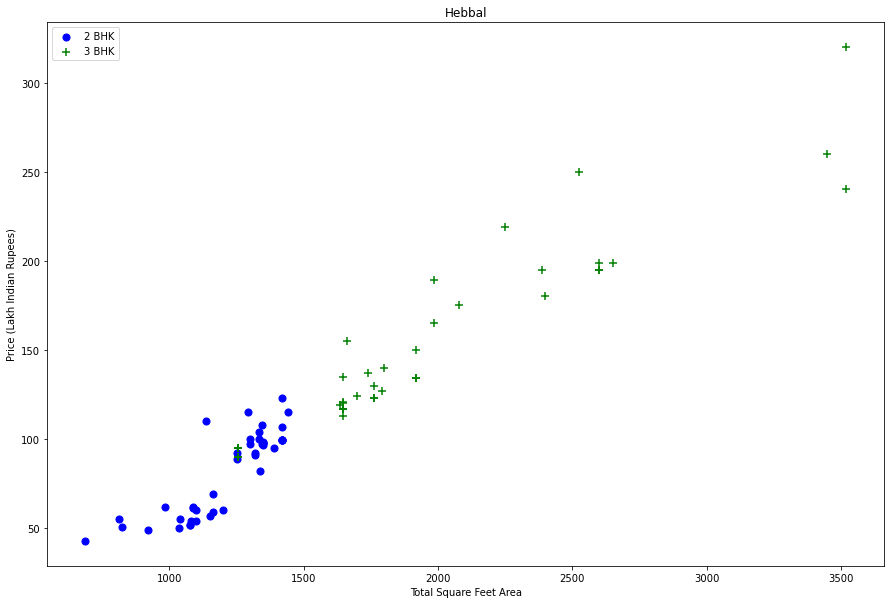

In [106]:
plot_scatter_chart(df9,"Hebbal")

Text(0, 0.5, 'Count')

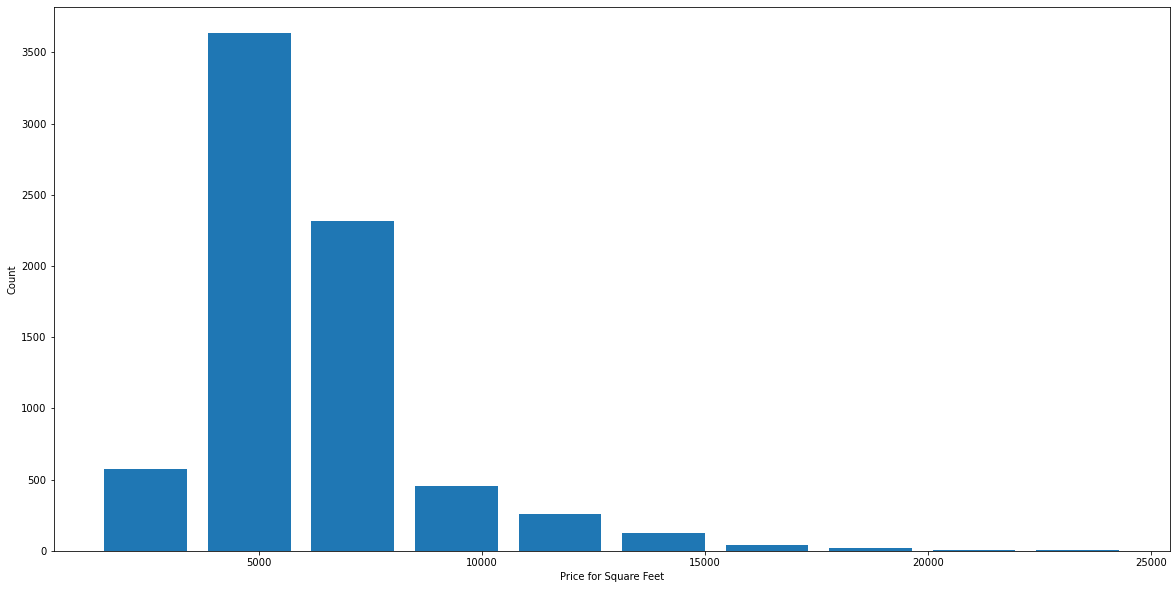

In [58]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_for_sqft,rwidth=0.8)
plt.xlabel("Price for Square Feet")
plt.ylabel("Count")

In [59]:
df9.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [60]:
df9[df9.bath>10]

,location,total_sqft,bath,price,bhk,price_for_sqft
600,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5377,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8591,other,12000.0,12.0,525.0,10,4375.000000
8677,other,10000.0,16.0,550.0,16,5500.000000
9381,other,6000.0,12.0,150.0,11,2500.000000
9697,other,5425.0,13.0,275.0,13,5069.124424


In [61]:
df9[df9.bath>df9.bhk+2]

,location,total_sqft,bath,price,bhk,price_for_sqft
600,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1665,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5338,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6825,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8519,other,11338.0,9.0,1000.0,6,8819.897689


In [62]:
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7351, 6)

In [63]:
df10.head(2)

,location,total_sqft,bath,price,bhk,price_for_sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667


In [64]:
df_input = df10.drop(['price_for_sqft'],axis='columns')

In [65]:
df_input.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [67]:
dummies = pd.get_dummies(df_input['location'])
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df11 = pd.concat([df_input,dummies.drop('other',axis='columns')],axis='columns')

In [73]:
df12 = df11.drop(['location','price'],axis='columns')

In [74]:
df12

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10272,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10275,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10276,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X= df12

In [76]:
X.shape

(7351, 256)

In [82]:
y = df11.price

In [83]:
len(y)

7351

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [166]:
from sklearn.linear_model import LinearRegression 
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8033327406190796

In [170]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2)

score_array = cross_val_score(LinearRegression(), X, y, cv=cv)
score_array

array([0.79304394, 0.82195497, 0.86601283, 0.84026031, 0.81926116])

In [171]:
score_array.mean()

0.828106640814932

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [182]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {'linear_regression':{
        'model':LinearRegression(),
        'params':{'normalize':[True,False]}
    },
            'lasso':{
                'model':Lasso(),
                'params':{'alpha':[1,2],'selection':['random','cyclic']}
            },
            'decision_tree': {
                'model': DecisionTreeRegressor(),
                'params': {'criterion' : ['mse','friedman_mse'],'splitter': ['best','random']}
            }}
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

    
    

In [183]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.846465,{'normalize': False}
1,lasso,0.682684,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.748494,"{'criterion': 'mse', 'splitter': 'random'}"


In [184]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [185]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.15310137599167

In [186]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

88.85003837024483

In [187]:
predict_price('Indira Nagar',1000, 2, 2)

162.99551839012844

In [188]:
predict_price('Indira Nagar',1000, 3, 3)

165.6924553843816

In [203]:
import pickle
with open('E:\\`MY STUDIES\Machine Learning\\ML\\Project-01\\p\\banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [205]:
import json
columns = {'data_columns':[col.lower() for col in X.columns]}
with open('E:\\`MY STUDIES\Machine Learning\\ML\\Project-01\\p\\columns.json','w') as f:
    f.write(json.dumps(columns))
